In [84]:
import numpy as np
import pandas as pd
import scipy
from scipy import stats

from bokeh.plotting import figure, show, gridplot
import zipfile

In [57]:
zf = zipfile.ZipFile('brain-diffusion_data.zip')
file_handle = zf.open('Mean_Square_Displacement_Data.csv')
msd = pd.read_csv(file_handle)

In [58]:
msd

,Unnamed: 0,PEG-PLGA4A UP 1,PEG-PLGA4A UP 2,PEG-PLGA4A UP 3,PEG-PLGA15k UP 1,PEG-PLGA15k UP 2,PEG-PLGA15k UP 3,PEG-PLGA4A P80 1,PEG-PLGA4A P80 2,PEG-PLGA4A P80 3,...,PLGA15k 2CHA 1,PLGA15k 2CHA 2,PLGA15k 2CHA 3,PLGA15k 0.5CHA 1,PLGA15k 0.5CHA 2,PLGA15k 0.5CHA 3,Unnamed: 67,Unnamed: 68,Unnamed: 69,Unnamed: 70
0,Particle,PEG-PLGA4A UP,PEG-PLGA4A UP,PEG-PLGA4A UP,PEG-PLGA15k UP,PEG-PLGA15k UP,PEG-PLGA15k UP,PEG-PLGA4A P80,PEG-PLGA4A P80,PEG-PLGA4A P80,...,PLGA15k 2CHA,PLGA15k 2CHA,PLGA15k 2CHA,PLGA15k 0.5CHA,PLGA15k 0.5CHA,PLGA15k 0.5CHA,NaN,NaN,NaN,NaN
1,Rat tissue,1,2,3,1,2,3,1,2,3,...,1,2,3,1,2,3,NaN,NaN,NaN,NaN
2,0.0667,0.002895854,0.001329666,0.000285821,0.001848768,0.000682974,0.006331794,0.000312074,0.000430165,0.000768138,...,0.000658895,0.00092313,0.000680525,0.000640189,0.000560151,0.001521587,NaN,NaN,NaN,NaN
3,0.1334,0.004271272,0.001853659,0.000329555,0.00266333,0.000867515,0.012039057,0.000349582,0.00045163,0.000813228,...,0.000681083,0.001078957,0.000711397,0.000670892,0.000577261,0.001583908,NaN,NaN,NaN,NaN
4,0.2001,0.005200092,0.00220085,0.000356759,0.003301882,0.000985239,0.016859532,0.000374829,0.000466776,0.000844452,...,0.000693738,0.001176083,0.000728315,0.000698982,0.00059301,0.001636353,NaN,NaN,NaN,NaN
5,0.2668,0.005875895,0.002453159,0.00037507,0.003821384,0.001067316,0.021151684,0.000387362,0.000473964,0.000873224,...,0.000709202,0.001248696,0.000746947,0.00071528,0.000603522,0.001689251,NaN,NaN,NaN,NaN
6,0.3335,0.006544621,0.002707455,0.000396364,0.004323253,0.001141488,0.025090246,0.000398819,0.00048708,0.000897064,...,0.000720289,0.001315956,0.000756545,0.000729087,0.000611658,0.001711553,NaN,NaN,NaN,NaN
7,0.4002,0.00709755,0.002893926,0.000412492,0.00474334,0.001198364,0.028937348,0.000406474,0.000492309,0.000922251,...,0.000734723,0.001382596,0.000773024,0.000753109,0.000622874,0.001749511,NaN,NaN,NaN,NaN
8,0.4669,0.007617788,0.003076971,0.000431996,0.005217423,0.001274841,0.032641199,0.000415194,0.000497118,0.000952199,...,0.000742704,0.001456336,0.000784105,0.000763066,0.000635647,0.001778964,NaN,NaN,NaN,NaN
9,0.5336,0.008060183,0.003249684,0.000450429,0.005605922,0.001327556,0.036520473,0.000425047,0.000508942,0.000967796,...,0.000756486,0.001517564,0.000800955,0.000778724,0.000646949,0.001799432,NaN,NaN,NaN,NaN


In [59]:
msd.columns

Index([u'Unnamed: 0', u'PEG-PLGA4A UP 1', u'PEG-PLGA4A UP 2',
       u'PEG-PLGA4A UP 3', u'PEG-PLGA15k UP 1', u'PEG-PLGA15k UP 2',
       u'PEG-PLGA15k UP 3', u'PEG-PLGA4A P80 1', u'PEG-PLGA4A P80 2',
       u'PEG-PLGA4A P80 3', u'PEG-PLGA15k P80 1', u'PEG-PLGA15k P80 2',
       u'PEG-PLGA15k P80 3', u'PEG-PLGA4A F68 1', u'PEG-PLGA4A F68 2',
       u'PEG-PLGA4A F68 3', u'PEG-PLGA15k F68 1', u'PEG-PLGA15k F68 2',
       u'PEG-PLGA15k F68 3', u'PEG-PLGA4A 5%CHA 1', u'PEG-PLGA4A 5%CHA 2',
       u'PEG-PLGA4A 5%CHA 3', u'PEG-PLGA15k 5%CHA 1', u'PEG-PLGA15k 5%CHA 2',
       u'PEG-PLGA15k 5%CHA 3', u'PEG-PLGA15k 2CHA 1', u'PEG-PLGA15k 2CHA 2',
       u'PEG-PLGA15k 2CHA 3', u'PEG-PLGA15k 0.5CHA 1', u'PEG-PLGA15k 0.5CHA 2',
       u'PEG-PLGA15k 0.5CHA 3', u'PLGA 4A UP-Exp 1 1', u'PLGA 4A UP-Exp 1 2',
       u'PLGA 4A UP-Exp 1 3', u'PEG-PLGA4A UP-Exp 1 1',
       u'PEG-PLGA4A UP-Exp 1 2', u'PEG-PLGA4A UP-Exp 1 3', u'PLGA58k UP 1',
       u'PLGA58k UP 2', u'PLGA58k UP 3', u'PLGA15k UP 1', u'PLGA

In [60]:
msd.columns = msd.iloc[0]
msd.head()

,Particle,PEG-PLGA4A UP,PEG-PLGA4A UP,PEG-PLGA4A UP,PEG-PLGA15k UP,PEG-PLGA15k UP,PEG-PLGA15k UP,PEG-PLGA4A P80,PEG-PLGA4A P80,PEG-PLGA4A P80,...,PLGA15k 2CHA,PLGA15k 2CHA,PLGA15k 2CHA,PLGA15k 0.5CHA,PLGA15k 0.5CHA,PLGA15k 0.5CHA,nan,nan,nan,nan
0,Particle,PEG-PLGA4A UP,PEG-PLGA4A UP,PEG-PLGA4A UP,PEG-PLGA15k UP,PEG-PLGA15k UP,PEG-PLGA15k UP,PEG-PLGA4A P80,PEG-PLGA4A P80,PEG-PLGA4A P80,...,PLGA15k 2CHA,PLGA15k 2CHA,PLGA15k 2CHA,PLGA15k 0.5CHA,PLGA15k 0.5CHA,PLGA15k 0.5CHA,NaN,NaN,NaN,NaN
1,Rat tissue,1,2,3,1,2,3,1,2,3,...,1,2,3,1,2,3,NaN,NaN,NaN,NaN
2,0.0667,0.002895854,0.001329666,0.000285821,0.001848768,0.000682974,0.006331794,0.000312074,0.000430165,0.000768138,...,0.000658895,0.00092313,0.000680525,0.000640189,0.000560151,0.001521587,NaN,NaN,NaN,NaN
3,0.1334,0.004271272,0.001853659,0.000329555,0.00266333,0.000867515,0.012039057,0.000349582,0.00045163,0.000813228,...,0.000681083,0.001078957,0.000711397,0.000670892,0.000577261,0.001583908,NaN,NaN,NaN,NaN
4,0.2001,0.005200092,0.00220085,0.000356759,0.003301882,0.000985239,0.016859532,0.000374829,0.000466776,0.000844452,...,0.000693738,0.001176083,0.000728315,0.000698982,0.00059301,0.001636353,NaN,NaN,NaN,NaN


In [61]:
msd = msd.iloc[1:]
msd.head()

,Particle,PEG-PLGA4A UP,PEG-PLGA4A UP,PEG-PLGA4A UP,PEG-PLGA15k UP,PEG-PLGA15k UP,PEG-PLGA15k UP,PEG-PLGA4A P80,PEG-PLGA4A P80,PEG-PLGA4A P80,...,PLGA15k 2CHA,PLGA15k 2CHA,PLGA15k 2CHA,PLGA15k 0.5CHA,PLGA15k 0.5CHA,PLGA15k 0.5CHA,nan,nan,nan,nan
1,Rat tissue,1,2,3,1,2,3,1,2,3,...,1,2,3,1,2,3,NaN,NaN,NaN,NaN
2,0.0667,0.002895854,0.001329666,0.000285821,0.001848768,0.000682974,0.006331794,0.000312074,0.000430165,0.000768138,...,0.000658895,0.00092313,0.000680525,0.000640189,0.000560151,0.001521587,NaN,NaN,NaN,NaN
3,0.1334,0.004271272,0.001853659,0.000329555,0.00266333,0.000867515,0.012039057,0.000349582,0.00045163,0.000813228,...,0.000681083,0.001078957,0.000711397,0.000670892,0.000577261,0.001583908,NaN,NaN,NaN,NaN
4,0.2001,0.005200092,0.00220085,0.000356759,0.003301882,0.000985239,0.016859532,0.000374829,0.000466776,0.000844452,...,0.000693738,0.001176083,0.000728315,0.000698982,0.00059301,0.001636353,NaN,NaN,NaN,NaN
5,0.2668,0.005875895,0.002453159,0.00037507,0.003821384,0.001067316,0.021151684,0.000387362,0.000473964,0.000873224,...,0.000709202,0.001248696,0.000746947,0.00071528,0.000603522,0.001689251,NaN,NaN,NaN,NaN


In [71]:
columns = msd.columns
columns = columns[1:67]
columns2 = [ii for n, ii in enumerate(columns) if ii not in columns[:n]]
#columns = list(set(columns))
columns2

['PEG-PLGA4A UP',
 'PEG-PLGA15k UP',
 'PEG-PLGA4A P80',
 'PEG-PLGA15k P80',
 'PEG-PLGA4A F68',
 'PEG-PLGA15k F68',
 'PEG-PLGA4A 5%CHA',
 'PEG-PLGA15k 5%CHA',
 'PEG-PLGA15k 2CHA',
 'PEG-PLGA15k 0.5CHA',
 'PLGA 4A UP-Exp 1',
 'PEG-PLGA4A UP-Exp 1',
 'PLGA58k UP',
 'PLGA15k UP',
 'PLGA4A P80',
 'PLGA15k P80',
 'PLGA4A F68',
 'PLGA15k F68',
 'PLGA4A 5%CHA',
 'PLGA15k 5%CHA',
 'PLGA15k 2CHA',
 'PLGA15k 0.5CHA']

In [63]:
len(columns)

71

In [10]:
a = msd['PEG-PLGA4A UP'].ix[2]

In [11]:
a

0
PEG-PLGA4A UP    0.002895854
PEG-PLGA4A UP    0.001329666
PEG-PLGA4A UP    0.000285821
Name: 2, dtype: object

In [12]:
b = list(a[[0,1,2]])

In [14]:
d = []
for i in b:
    c = float(i)
    d.append(c)

In [15]:
d

[0.002895854, 0.001329666, 0.000285821]

In [18]:
scipy.stats.gmean(d)

0.0010324549722719215

In [19]:
np.mean(d)

0.0015037803333333335

In [55]:
def compute_geomean(df, ColumnName):
    g = [0]
    for i in range(2, len(df)+1):
        a = df[ColumnName].ix[i]
        b = list(a[[0,1,2]])
        d= []
        for j in b:
            c = float(j)
            d.append(c)
        g.append(scipy.stats.gmean(d))
    df[ColumnName+' geo'] = g

In [56]:
compute_geomean(msd,'PEG-PLGA4A UP')
msd

,Particle,PEG-PLGA4A UP,PEG-PLGA4A UP,PEG-PLGA4A UP,PEG-PLGA15k UP,PEG-PLGA15k UP,PEG-PLGA15k UP,PEG-PLGA4A P80,PEG-PLGA4A P80,PEG-PLGA4A P80,...,PLGA15k 2CHA,PLGA15k 2CHA,PLGA15k 0.5CHA,PLGA15k 0.5CHA,PLGA15k 0.5CHA,nan,nan,nan,nan,PEG-PLGA4A UP geo
1,Rat tissue,1,2,3,1,2,3,1,2,3,...,2,3,1,2,3,NaN,NaN,NaN,NaN,0.000000
2,0.0667,0.002895854,0.001329666,0.000285821,0.001848768,0.000682974,0.006331794,0.000312074,0.000430165,0.000768138,...,0.00092313,0.000680525,0.000640189,0.000560151,0.001521587,NaN,NaN,NaN,NaN,0.001032
3,0.1334,0.004271272,0.001853659,0.000329555,0.00266333,0.000867515,0.012039057,0.000349582,0.00045163,0.000813228,...,0.001078957,0.000711397,0.000670892,0.000577261,0.001583908,NaN,NaN,NaN,NaN,0.001377
4,0.2001,0.005200092,0.00220085,0.000356759,0.003301882,0.000985239,0.016859532,0.000374829,0.000466776,0.000844452,...,0.001176083,0.000728315,0.000698982,0.00059301,0.001636353,NaN,NaN,NaN,NaN,0.001598
5,0.2668,0.005875895,0.002453159,0.00037507,0.003821384,0.001067316,0.021151684,0.000387362,0.000473964,0.000873224,...,0.001248696,0.000746947,0.00071528,0.000603522,0.001689251,NaN,NaN,NaN,NaN,0.001755
6,0.3335,0.006544621,0.002707455,0.000396364,0.004323253,0.001141488,0.025090246,0.000398819,0.00048708,0.000897064,...,0.001315956,0.000756545,0.000729087,0.000611658,0.001711553,NaN,NaN,NaN,NaN,0.001915
7,0.4002,0.00709755,0.002893926,0.000412492,0.00474334,0.001198364,0.028937348,0.000406474,0.000492309,0.000922251,...,0.001382596,0.000773024,0.000753109,0.000622874,0.001749511,NaN,NaN,NaN,NaN,0.002039
8,0.4669,0.007617788,0.003076971,0.000431996,0.005217423,0.001274841,0.032641199,0.000415194,0.000497118,0.000952199,...,0.001456336,0.000784105,0.000763066,0.000635647,0.001778964,NaN,NaN,NaN,NaN,0.002163
9,0.5336,0.008060183,0.003249684,0.000450429,0.005605922,0.001327556,0.036520473,0.000425047,0.000508942,0.000967796,...,0.001517564,0.000800955,0.000778724,0.000646949,0.001799432,NaN,NaN,NaN,NaN,0.002277
10,0.6003,0.008438281,0.003445512,0.000472183,0.005999552,0.001390058,0.040324645,0.000434809,0.000512946,0.00099202,...,0.001567332,0.000814944,0.00079397,0.000661414,0.001826684,NaN,NaN,NaN,NaN,0.002394


In [72]:
for title in columns:
    compute_geomean(msd, title)

/Users/Faulkner/miniconda2/lib/python2.7/site-packages/ipykernel/__main__.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [73]:
msd

,Particle,PEG-PLGA4A UP,PEG-PLGA4A UP,PEG-PLGA4A UP,PEG-PLGA15k UP,PEG-PLGA15k UP,PEG-PLGA15k UP,PEG-PLGA4A P80,PEG-PLGA4A P80,PEG-PLGA4A P80,...,PLGA58k UP geo,PLGA15k UP geo,PLGA4A P80 geo,PLGA15k P80 geo,PLGA4A F68 geo,PLGA15k F68 geo,PLGA4A 5%CHA geo,PLGA15k 5%CHA geo,PLGA15k 2CHA geo,PLGA15k 0.5CHA geo
1,Rat tissue,1,2,3,1,2,3,1,2,3,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.0667,0.002895854,0.001329666,0.000285821,0.001848768,0.000682974,0.006331794,0.000312074,0.000430165,0.000768138,...,0.000386,0.000270,0.000600,0.000340,0.000420,0.000550,0.000751,0.000679,0.000745,0.000817
3,0.1334,0.004271272,0.001853659,0.000329555,0.00266333,0.000867515,0.012039057,0.000349582,0.00045163,0.000813228,...,0.000420,0.000298,0.000645,0.000385,0.000437,0.000582,0.000804,0.000708,0.000806,0.000850
4,0.2001,0.005200092,0.00220085,0.000356759,0.003301882,0.000985239,0.016859532,0.000374829,0.000466776,0.000844452,...,0.000451,0.000321,0.000680,0.000419,0.000447,0.000604,0.000841,0.000729,0.000841,0.000879
5,0.2668,0.005875895,0.002453159,0.00037507,0.003821384,0.001067316,0.021151684,0.000387362,0.000473964,0.000873224,...,0.000473,0.000340,0.000700,0.000442,0.000456,0.000623,0.000869,0.000739,0.000871,0.000900
6,0.3335,0.006544621,0.002707455,0.000396364,0.004323253,0.001141488,0.025090246,0.000398819,0.00048708,0.000897064,...,0.000498,0.000358,0.000724,0.000466,0.000465,0.000645,0.000896,0.000751,0.000895,0.000914
7,0.4002,0.00709755,0.002893926,0.000412492,0.00474334,0.001198364,0.028937348,0.000406474,0.000492309,0.000922251,...,0.000520,0.000376,0.000747,0.000486,0.000473,0.000663,0.000924,0.000762,0.000923,0.000936
8,0.4669,0.007617788,0.003076971,0.000431996,0.005217423,0.001274841,0.032641199,0.000415194,0.000497118,0.000952199,...,0.000543,0.000395,0.000770,0.000507,0.000479,0.000681,0.000947,0.000778,0.000947,0.000952
9,0.5336,0.008060183,0.003249684,0.000450429,0.005605922,0.001327556,0.036520473,0.000425047,0.000508942,0.000967796,...,0.000566,0.000417,0.000795,0.000527,0.000485,0.000702,0.000972,0.000789,0.000972,0.000968
10,0.6003,0.008438281,0.003445512,0.000472183,0.005999552,0.001390058,0.040324645,0.000434809,0.000512946,0.00099202,...,0.000594,0.000442,0.000816,0.000551,0.000496,0.000723,0.000997,0.000801,0.000997,0.000986


In [74]:
msd = msd.set_index('Particle')
msd

,PEG-PLGA4A UP,PEG-PLGA4A UP,PEG-PLGA4A UP,PEG-PLGA15k UP,PEG-PLGA15k UP,PEG-PLGA15k UP,PEG-PLGA4A P80,PEG-PLGA4A P80,PEG-PLGA4A P80,PEG-PLGA15k P80,...,PLGA58k UP geo,PLGA15k UP geo,PLGA4A P80 geo,PLGA15k P80 geo,PLGA4A F68 geo,PLGA15k F68 geo,PLGA4A 5%CHA geo,PLGA15k 5%CHA geo,PLGA15k 2CHA geo,PLGA15k 0.5CHA geo
Particle,,,,,,,,,,,,,,,,,,,,,
Rat tissue,1,2,3,1,2,3,1,2,3,1,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
0.0667,0.002895854,0.001329666,0.000285821,0.001848768,0.000682974,0.006331794,0.000312074,0.000430165,0.000768138,0.000524013,...,0.000386,0.000270,0.000600,0.000340,0.000420,0.000550,0.000751,0.000679,0.000745,0.000817
0.1334,0.004271272,0.001853659,0.000329555,0.00266333,0.000867515,0.012039057,0.000349582,0.00045163,0.000813228,0.000540623,...,0.000420,0.000298,0.000645,0.000385,0.000437,0.000582,0.000804,0.000708,0.000806,0.000850
0.2001,0.005200092,0.00220085,0.000356759,0.003301882,0.000985239,0.016859532,0.000374829,0.000466776,0.000844452,0.000552617,...,0.000451,0.000321,0.000680,0.000419,0.000447,0.000604,0.000841,0.000729,0.000841,0.000879
0.2668,0.005875895,0.002453159,0.00037507,0.003821384,0.001067316,0.021151684,0.000387362,0.000473964,0.000873224,0.000557695,...,0.000473,0.000340,0.000700,0.000442,0.000456,0.000623,0.000869,0.000739,0.000871,0.000900
0.3335,0.006544621,0.002707455,0.000396364,0.004323253,0.001141488,0.025090246,0.000398819,0.00048708,0.000897064,0.000566993,...,0.000498,0.000358,0.000724,0.000466,0.000465,0.000645,0.000896,0.000751,0.000895,0.000914
0.4002,0.00709755,0.002893926,0.000412492,0.00474334,0.001198364,0.028937348,0.000406474,0.000492309,0.000922251,0.000574633,...,0.000520,0.000376,0.000747,0.000486,0.000473,0.000663,0.000924,0.000762,0.000923,0.000936
0.4669,0.007617788,0.003076971,0.000431996,0.005217423,0.001274841,0.032641199,0.000415194,0.000497118,0.000952199,0.000580384,...,0.000543,0.000395,0.000770,0.000507,0.000479,0.000681,0.000947,0.000778,0.000947,0.000952
0.5336,0.008060183,0.003249684,0.000450429,0.005605922,0.001327556,0.036520473,0.000425047,0.000508942,0.000967796,0.000589246,...,0.000566,0.000417,0.000795,0.000527,0.000485,0.000702,0.000972,0.000789,0.000972,0.000968


In [96]:
msd['PEG-PLGA4A UP geo']

Particle
Rat tissue    0.000000
0.0667        0.001032
0.1334        0.001377
0.2001        0.001598
0.2668        0.001755
0.3335        0.001915
0.4002        0.002039
0.4669        0.002163
0.5336        0.002277
0.6003        0.002394
0.667         0.002505
0.7337        0.002620
0.8004        0.002726
0.8671        0.002815
0.9338        0.002908
1.0005        0.003008
1.0672        0.003106
1.1339        0.003203
1.2006        0.003304
1.2673        0.003399
1.334         0.003483
1.4007        0.003599
1.4674        0.003689
1.5341        0.003777
1.6008        0.003871
1.6675        0.003972
1.7342        0.004059
1.8009        0.004149
1.8676        0.004230
1.9343        0.004223
                ...   
18.009        0.009898
18.0757       0.009934
18.1424       0.010002
18.2091       0.009955
18.2758       0.010060
18.3425       0.010079
18.4092       0.010088
18.4759       0.010076
18.5426       0.010130
18.6093       0.010139
18.676        0.010152
18.7427       0.010194
18

In [112]:
tempindex = [0.0]
for i in range(1, len(msd)):
    tempindex.append(float(msd.index[i]))
tempindex

[0.0,
 0.0667,
 0.1334,
 0.2001,
 0.2668,
 0.3335,
 0.4002,
 0.4669,
 0.5336,
 0.6003,
 0.667,
 0.7337,
 0.8004,
 0.8671,
 0.9338,
 1.0005,
 1.0672,
 1.1339,
 1.2006,
 1.2673,
 1.334,
 1.4007,
 1.4674,
 1.5341,
 1.6008,
 1.6675,
 1.7342,
 1.8009,
 1.8676,
 1.9343,
 2.001,
 2.0677,
 2.1344,
 2.2011,
 2.2678,
 2.3345,
 2.4012,
 2.4679,
 2.5346,
 2.6013,
 2.668,
 2.7347,
 2.8014,
 2.8681,
 2.9348,
 3.0015,
 3.0682,
 3.1349,
 3.2016,
 3.2683,
 3.335,
 3.4017,
 3.4684,
 3.5351,
 3.6018,
 3.6685,
 3.7352,
 3.8019,
 3.8686,
 3.9353,
 4.002,
 4.0687,
 4.1354,
 4.2021,
 4.2688,
 4.3355,
 4.4022,
 4.4689,
 4.5356,
 4.6023,
 4.669,
 4.7357,
 4.8024,
 4.8691,
 4.9358,
 5.0025,
 5.0692,
 5.1359,
 5.2026,
 5.2693,
 5.336,
 5.4027,
 5.4694,
 5.5361,
 5.6028,
 5.6695,
 5.7362,
 5.8029,
 5.8696,
 5.9363,
 6.003,
 6.0697,
 6.1364,
 6.2031,
 6.2698,
 6.3365,
 6.4032,
 6.4699,
 6.5366,
 6.6033,
 6.67,
 6.7367,
 6.8034,
 6.8701,
 6.9368,
 7.0035,
 7.0702,
 7.1369,
 7.2036,
 7.2703,
 7.337,
 7.4037,
 7.4704

In [114]:
msd['tempindex'] = tempindex
msd = msd.set_index('tempindex')
msd

,PEG-PLGA4A UP,PEG-PLGA4A UP,PEG-PLGA4A UP,PEG-PLGA15k UP,PEG-PLGA15k UP,PEG-PLGA15k UP,PEG-PLGA4A P80,PEG-PLGA4A P80,PEG-PLGA4A P80,PEG-PLGA15k P80,...,PLGA58k UP geo,PLGA15k UP geo,PLGA4A P80 geo,PLGA15k P80 geo,PLGA4A F68 geo,PLGA15k F68 geo,PLGA4A 5%CHA geo,PLGA15k 5%CHA geo,PLGA15k 2CHA geo,PLGA15k 0.5CHA geo
tempindex,,,,,,,,,,,,,,,,,,,,,
0.0000,1,2,3,1,2,3,1,2,3,1,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
0.0667,0.002895854,0.001329666,0.000285821,0.001848768,0.000682974,0.006331794,0.000312074,0.000430165,0.000768138,0.000524013,...,0.000386,0.000270,0.000600,0.000340,0.000420,0.000550,0.000751,0.000679,0.000745,0.000817
0.1334,0.004271272,0.001853659,0.000329555,0.00266333,0.000867515,0.012039057,0.000349582,0.00045163,0.000813228,0.000540623,...,0.000420,0.000298,0.000645,0.000385,0.000437,0.000582,0.000804,0.000708,0.000806,0.000850
0.2001,0.005200092,0.00220085,0.000356759,0.003301882,0.000985239,0.016859532,0.000374829,0.000466776,0.000844452,0.000552617,...,0.000451,0.000321,0.000680,0.000419,0.000447,0.000604,0.000841,0.000729,0.000841,0.000879
0.2668,0.005875895,0.002453159,0.00037507,0.003821384,0.001067316,0.021151684,0.000387362,0.000473964,0.000873224,0.000557695,...,0.000473,0.000340,0.000700,0.000442,0.000456,0.000623,0.000869,0.000739,0.000871,0.000900
0.3335,0.006544621,0.002707455,0.000396364,0.004323253,0.001141488,0.025090246,0.000398819,0.00048708,0.000897064,0.000566993,...,0.000498,0.000358,0.000724,0.000466,0.000465,0.000645,0.000896,0.000751,0.000895,0.000914
0.4002,0.00709755,0.002893926,0.000412492,0.00474334,0.001198364,0.028937348,0.000406474,0.000492309,0.000922251,0.000574633,...,0.000520,0.000376,0.000747,0.000486,0.000473,0.000663,0.000924,0.000762,0.000923,0.000936
0.4669,0.007617788,0.003076971,0.000431996,0.005217423,0.001274841,0.032641199,0.000415194,0.000497118,0.000952199,0.000580384,...,0.000543,0.000395,0.000770,0.000507,0.000479,0.000681,0.000947,0.000778,0.000947,0.000952
0.5336,0.008060183,0.003249684,0.000450429,0.005605922,0.001327556,0.036520473,0.000425047,0.000508942,0.000967796,0.000589246,...,0.000566,0.000417,0.000795,0.000527,0.000485,0.000702,0.000972,0.000789,0.000972,0.000968


In [115]:
msd.index

Float64Index([    0.0,  0.0667,  0.1334,  0.2001,  0.2668,  0.3335,  0.4002,
               0.4669,  0.5336,  0.6003,
              ...
               19.343, 19.4097, 19.4764, 19.5431, 19.6098, 19.6765, 19.7432,
              19.8099, 19.8766, 19.9433],
             dtype='float64', name=u'tempindex', length=300)

In [124]:
msd['PEG-PLGA4A UP geo'][19.9433]

0.0090758544513237227

In [131]:
%matplotlib inline

In [134]:
def compute_plot_Deff(ParticleChemistry,tmin,tmax):
    temp1_msd = msd[msd.index >= tmin]
    temp2_msd = temp1_msd[temp1_msd.index <= tmax]
    temp2_msd[ParticleChemistry].hist()
    Deff = scipy.stats.gmean(temp2_msd[ParticleChemistry])
    print Deff

0.00124967908156


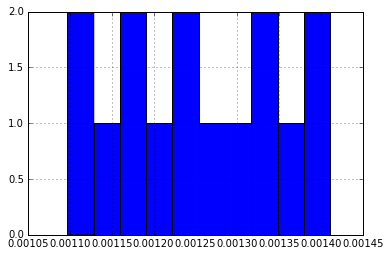

In [135]:
compute_plot_Deff('PLGA15k 0.5CHA geo',1,2)